In [2]:
import geopandas as gpd
import pandas as pd
import glob

In [3]:
shapefile_path = r"e:\work\spatio_evo_urbanvisenv_svi\范围线\new_2024_03_25\urban_ten_indic_matrix.shp"
shp_ = gpd.read_file(shapefile_path)

In [4]:
shp_.head(3)
shp_.shape

(2566, 16)

In [5]:
shapefile_path = r"e:\work\spatio_evo_urbanvisenv_svi\范围线\new_2024_03_25\six_urban_16_cluser_2013.shp"
shp_2013 = gpd.read_file(shapefile_path)

In [6]:
shapefile_path = r"e:\work\spatio_evo_urbanvisenv_svi\范围线\new_2024_03_25\six_urban_16_cluser_2016.shp"
shp_2016 = gpd.read_file(shapefile_path)

In [7]:
shapefile_path = r"e:\work\spatio_evo_urbanvisenv_svi\范围线\new_2024_03_25\six_urban_16_cluser_2021.shp"
shp_2021 = gpd.read_file(shapefile_path)

In [8]:
cluster_2013 = pd.DataFrame()  
cluster_2013['hexid'] = shp_2013['hexid']
cluster_2013['cluster_2013'] = shp_2013['cluster']
shp_01 = shp_.merge(cluster_2013, on = 'hexid',how='left')

cluster_2016 = pd.DataFrame()  
cluster_2016['hexid'] = shp_2016['hexid']
cluster_2016['cluster_2016'] = shp_2016['cluster']
shp_02 = shp_01.merge(cluster_2016, on = 'hexid',how='left')

cluster_2021 = pd.DataFrame()  
cluster_2021['hexid'] = shp_2021['hexid']
cluster_2021['cluster_2021'] = shp_2021['cluster']
shp_03 = shp_02.merge(cluster_2021, on = 'hexid',how='left').fillna(0)

In [9]:
import numpy as np

shp_03['cluster_diff'] = shp_03['cluster_2016'] - shp_03['cluster_2013']
shp_03['cluster_2013_2016'] = np.where(shp_03['cluster_diff'] > 0, 1,np.where(shp_03['cluster_diff'] < 0, -1,shp_03['cluster_diff']))

shp_03['cluster_diff'] = shp_03['cluster_2021'] - shp_03['cluster_2016']
shp_03['cluster_2016_2021'] = np.where(shp_03['cluster_diff'] > 0, 1,np.where(shp_03['cluster_diff'] < 0, -1,shp_03['cluster_diff']))



In [10]:
shp_03.head(3)
# shp_.shape
# shp_01.shape
# shp_02.shape
# shp_03.shape# 假设您已经完成了合并操作


hexid  assortativ       area_m2  assortat_1       sky     plant  \
0  8a3c72772727fff    0.037037  19764.780841    0.037037  0.398677  0.148398   
1  8a3c7274b927fff    0.037037  19777.962373    0.037037  0.389933  0.082934   
2  8a3c7274962ffff    0.000000  19779.646834    0.000000  0.435742  0.053410   

   building      road  beautiful    boring  ...    safety   wealthy  \
0  0.160401  0.279584   0.602328  0.477790  ...  0.855211  0.389148   
1  0.125914  0.440832   0.574470  0.543052  ...  0.913531  0.439075   
2  0.112347  0.481759   0.654400  0.683499  ...  0.926432  0.438617   

   sv_counts                                           geometry  cluster_2013  \
0         40  POLYGON ((91.01385 29.63066, 91.01312 29.63035...           2.0   
1         56  POLYGON ((91.16697 29.64801, 91.16625 29.64769...           5.0   
2         16  POLYGON ((91.18620 29.65253, 91.18548 29.65222...           0.0   

  cluster_2016  cluster_2021  cluster_diff  cluster_2013_2016  \
0          0.0           4.0           4.0               -1.0   
1          5.0           3.0          -2.0                0.0   
2          5.0           3.0          -2.0                1.0   

   cluster_2016_2021  
0                1.0  
1               -1.0  
2               -1.0  

[3 rows x 22 columns]

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(150, 150))  # 设置为15英寸x15英寸
# （道路图层）
gdf_roads = gpd.read_file(r'e:\work\spatio_evo_urbanvisenv_svi\road\road.shp')  
target_crs = 'EPSG:4326'
# 转换CRS
gdf_roads_01 = gdf_roads.to_crs(target_crs)
# 绘制第二个图层（道路图层）
gdf_roads_01.plot(ax=ax, color='black', linewidth=0.08)  # 使用ax参数
# 创建一个颜色映射列表
colors = [
          (217/255, 0/255, 18/255), # cluster=1
          (1, 1, 1), # cluster=1
    (172/255, 211/255, 133/255),   # cluster=0
          ] # cluster=5
cmap = plt.cm.colors.ListedColormap(colors)
# shp_03.plot(ax=ax,column='cluster_2013_2016', cmap=cmap, legend=True)
shp_03.plot(ax=ax,column='cluster_2013_2016', cmap=cmap)
# shp_03.plot(ax=ax,column='cluster_2016_2021', cmap=cmap)

# 显示图表# 设置x轴标签
# ax.set_xlabel('q')
# ax.set_ylabel('q')
# 移除x轴和y轴的刻度
ax.set_xticks([])
ax.set_yticks([])
# 关闭边框
ax.axis('off')

# 显示图表
plt.show()

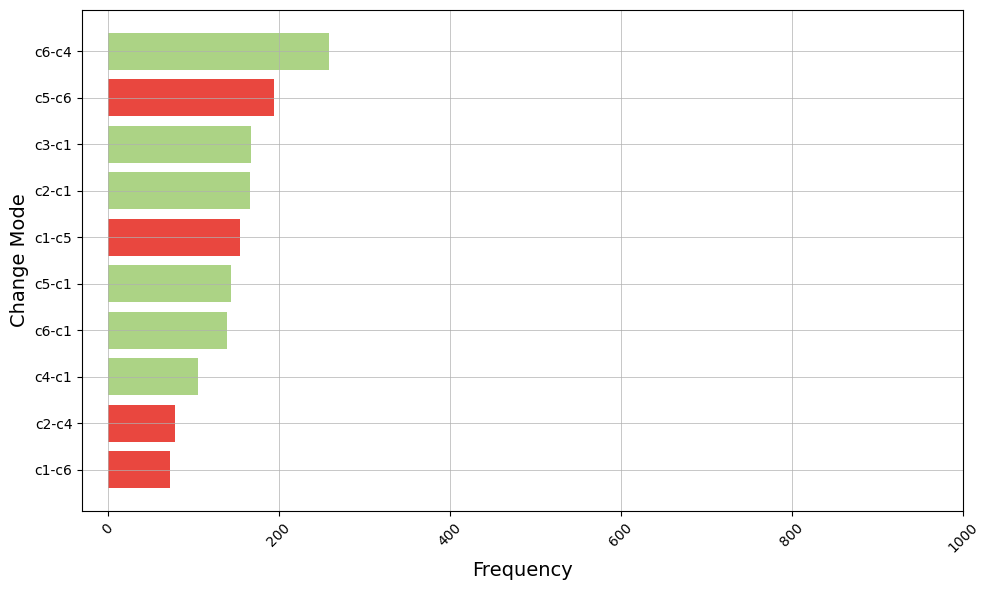

In [25]:
from collections import Counter
tuples_list = shp_03.apply(lambda row: (row['cluster_2013'], row['cluster_2016']), axis=1).tolist()
# tuples_list = shp_03.apply(lambda row: (row['cluster_2016'], row['cluster_2021']), axis=1).tolist()
# 
# 使用 Counter 计算每个元素的出现次数
element_counts = Counter(tuples_list)
import matplotlib.pyplot as plt

# 获取计数最大的前10个元素
most_common_elements = element_counts.most_common(12)

# 分离元素和计数
elements, counts = zip(*most_common_elements)

elements_ = []
counts_ = []

for i in  range(len(elements)):
    if elements[i][0] != elements[i][1]:
        elements_.append(elements[i])
        counts_.append(counts[i])
        if len(elements_) == 10:
            break

# 计算颜色
colors = [(172/255, 211/255, 133/255) if key[0] - key[1] > 0 else (233/255, 71/255, 63/255) for key in elements_]
elements_ = [f'c{str(int(element[0]+1))}-c{str(int(element[1]+1))}' for element in elements_]
# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.barh(elements_, counts_, color=colors)
plt.xlabel('Elements')
plt.ylabel('Counts')
plt.xlim(-30, 1000)  # 设置y轴的取值范围为0到1
# # plt.ylim(0, 1)  # 设置y轴的取值范围为0到1
# # 反转y轴的刻度
plt.gca().invert_yaxis()
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
# # 自定义x轴和y轴的刻度
# # plt.xticks(np.arange(0, 105, 5))
# # plt.yticks(np.arange(0, 1.01, 0.2))
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Change Mode', fontsize=14)
# # plt.title('Top 10 Elements by Count')
plt.xticks(rotation=45)  # 旋转x轴标签，以便更好地显示
plt.tight_layout()  # 调整布局
plt.show()

In [22]:
elements_ 

['c6-c4',
 'c5-c6',
 'c3-c1',
 'c2-c1',
 'c1-c5',
 'c5-c1',
 'c6-c1',
 'c4-c1',
 'c2-c4',
 'c1-c6']

In [23]:
counts_

[259, 194, 167, 166, 155, 144, 140, 105, 79, 73]